# Medidas del rendimiento de un algoritmo de Machine Learning
hasta el momento hemos pasado por varias tomas de contacto con python, scikit-learn y hemos visto conceptualmente los diferentes tipos de entrenamiento que podríamos aplicar.

llegados a este punto, en el que ya podemos entrenar un modelo debemos reflexionar acerca de los diferentes tipos de medidas de rendimiento que existen para problemas de entrenamiento supervisado (clasificación y regresión). Gracias a la interfaz común del API de scikit-learn, es trivial entrenar un tipo de modelo u otro, para el usuario es transparente.

## Clasificación

¿qué os parece la siguiente imagen?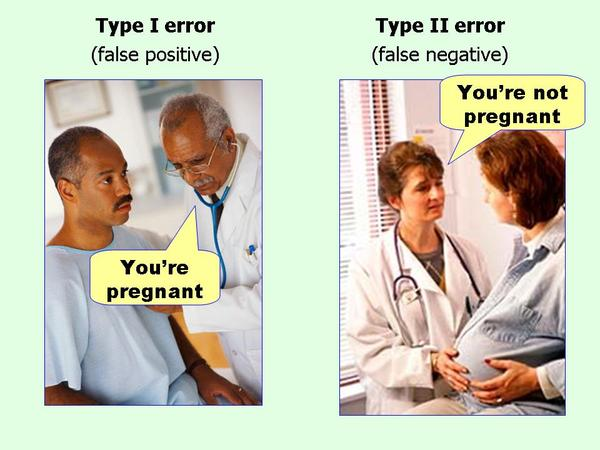

en un problema de clasificación podemos obtener la matriz de confusión, que no deja de ser una manera de calcular los aciertos y los fallos y medir si los errores cometidos han sido de Tipo I o de Tipo II. La matriz de confusión permite calcular múltiples medidas, como se puede ver en la siguiente imagen: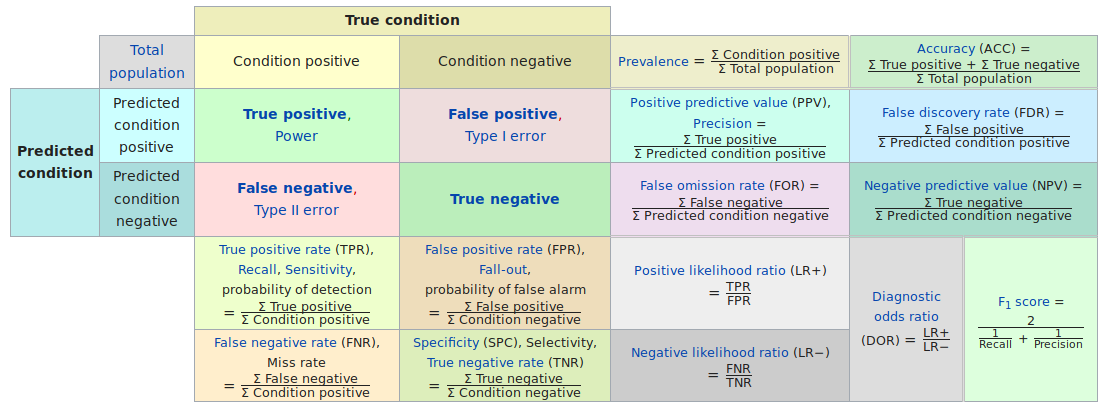

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report

bc_data = load_breast_cancer()

datos = bc_data.data
salida = bc_data.target

classifier = GaussianNB()
classifier.fit(datos, salida)

salida_pred = classifier.predict(datos)

print(classification_report(salida, salida_pred))
print(confusion_matrix(salida, salida_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(salida_pred,salida))

In [ ]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report

iris_data = load_iris()

datos = iris_data.data
salida = iris_data.target

classifier = GaussianNB()
classifier.fit(datos, salida)

salida_pred = classifier.predict(datos)

print(classification_report(salida, salida_pred))
print(confusion_matrix(salida, salida_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(salida_pred,salida))

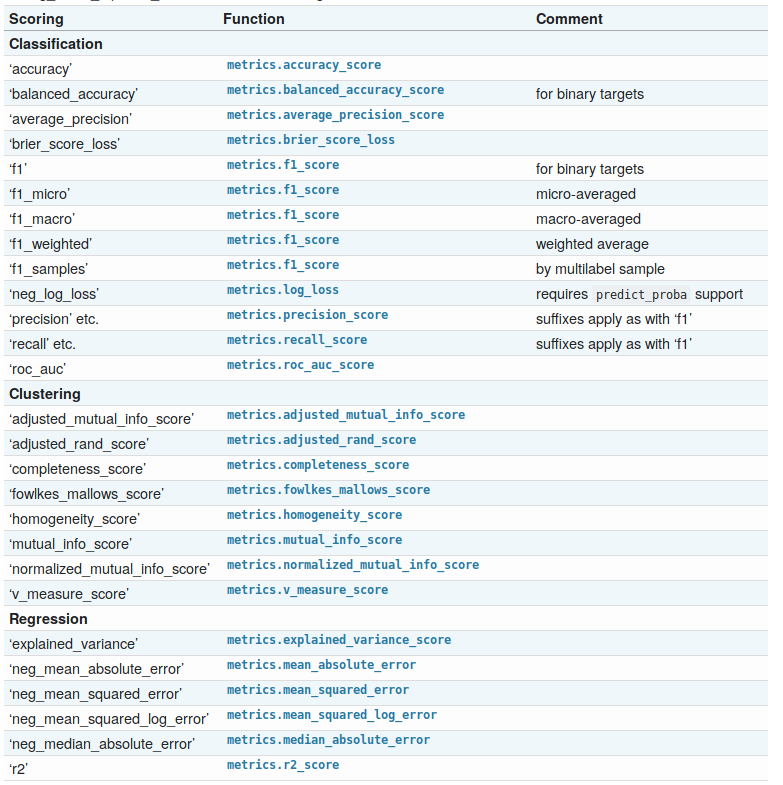

Es posible definir nuestras propias medidas y extraerlas del modelo: 

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate,cross_val_predict

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def score(y_true, y_pred): return accuracy_score(y_true, y_pred)

scoring = {'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn),
           'score': make_scorer(score)}

cv_results = cross_validate(classifier.fit(datos, salida), datos, salida,
                            scoring=scoring, cv=5,return_train_score=True)

print(cv_results['test_tp'])#hemos creado 4 scorer

sorted(cv_results.keys()) 
datos.shape

### Medidas de rendimiento más adecuadas en clasificación

las medidas simples como accuracy no son adecuadas, necesitamos más información acerca del comportamiento real del modelo. Necesitamos medidas combinadas de acierto que tengan en cuenta los errores de Tipo I y II. Dentro de estas medidas, existen varios estudios que indican que el Área Bajo la Curva ROC (AUC) es una de las más robustas, aunque también son buenas medidas F1, kappa, sensibilidad o especificidad.

Sin embargo, el AUC tiene una peculiaridad. Pregunta: ¿sabéis cuál es?
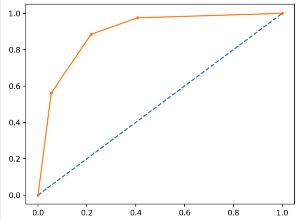

la curva plot representa la tasa de falsos positivos contra la de verdaderos positivos para un número determinado de threshold entre 0.0 y 1.0. La tasa de verdaderos positivos también se conoce como sensibilidad y  la tasa de falsos negativos con la especifidad invertida (1- especificidad)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline

bc = load_breast_cancer()
datos = bc.data
salida = bc.target

trainX, testX, trainy, testy = train_test_split(datos, salida, test_size=0.5, random_state=2)
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)

probs = model.predict_proba(testX)

# PREGUNTA: ¿Qué probabilidades nos quedamos?

probs = probs[:, 1]
print(probs)

auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(testy, probs)

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

En resumen:
+ las curvas ROC muestran el equilibrio entre la tasa de verdaderos y falsos positivos usando diferentes umbrales de probabilidad
+ las curvas Precision-Recall muestran el equilibrio entre la tasa de verdaderos positivos y el valor predictivo positvio usando diferentes umbrales de probabilidad
+ si los conjuntos de datos están desbalanceados es mejor usar la curva Precision-Recall


### Medidas de rendimiento más adecuadas en regresión

En general para problemas de regresión, las medidas más utilizadas son MSE, RMSE [web](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), R y R-cuadrado [web](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination).

vamos con un ejemplo:

In [ ]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
diabetes_dataset.data.shape

In [ ]:
diabetes_dataset.feature_names

In [ ]:
print(diabetes_dataset.DESCR)

una regresión lineal assume un modelo en el que se cumple 

\begin{align}
y = X\beta + c + \epsilon
\end{align}


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes_dataset.data, diabetes_dataset.target, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

PREGUNTA: ¿esto que da es bueno? ¿es malo? ¿qué es?


+ Returns the coefficient of determination R^2 of the prediction. [web de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)

In [ ]:
predicciones = model.predict(X_test)
error = abs(predicciones-y_test)
print(error[:15])

In [ ]:
error_dot = np.dot(error,error)
rmse=np.sqrt(error_dot/len(predicciones))
print(rmse)

PREGUNTA: ¿qué veis?



In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')
x = np.linspace(0, 300, 100)
y = x
plt.plot(x, y)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(model.predict(X_train), model.predict(X_train)-y_train, c='b', s=40, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test)-y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=300)
plt.title("Residuals plot. Entrenamiento (azul), test (verde)")
plt.ylabel("Residuos")

In [ ]:
from sklearn.preprocessing import StandardScaler
#X_train, X_test, y_train, y_test = train_test_split(diabetes_dataset.data, diabetes_dataset.target, test_size=0.2, random_state=42)
model = LinearRegression()
scaler = StandardScaler()
y_train=scaler.fit_transform(y_train.reshape(-1, 1))
y_test= scaler.fit_transform(y_test.reshape(-1, 1))

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
predicciones = model.predict(X_test)
error_norm = abs(predicciones-y_test)
error_dot=np.dot(error_norm.T,error_norm)
rmse_norm=np.sqrt(error_dot/len(predicciones))
print(rmse_norm)

In [ ]:
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')
x = np.linspace(-2, 2, 2)
y = x
plt.plot(x, y)
plt.show()

PREGUNTA: Echad un ojo a lo que he hecho y dadme una explicación!!



Básicamente, lo que pasa aquí es que:
+ R cuadrado es la proporción de variabilidad en y explicada por el modelo de regresión. Es la raíz cuadrada de R
+ RMSE mide la desviación estándard de los residuos (cómo cuánto de separados están los puntos de la línea). Influye la dimensión de la variable de salida, aunque la dispersión de los puntos es igual.

PREGUNTA: entonces, ¿entre qué valores se mueve RMSE? ¿R cuadrado?

# Conclusiones finales

La evaluación del rendimiento de los algoritmos es importante en función de si el criterio o medida utilizados es lo suficientemente potente para discriminar un buen modelo u otro.

Es por esto que en general:

+ en clasificación se usan AUC, Recall-Precision, kappa o f1. Hemos mencionado que en general la más aceptada es AUC pero en función del tipo de datos que estemos estudiando, se podría optar por otras medidas como Recall-Precision.
+ en regresión R cuadrado es la medida más aceptada. Cuantifica la fuerza de la relación lineal entre datos normalmente distribuidos. Es la raíz del coeficiente de correlación de Pearson. Cuando las features no estén distribuidas siguiendo una normal, o la relación entre variables no sea lineal, se recomienda utilizar el coeficiente de correlación de Spearman. Podéis leer más acerca de esto [aquí](http://geoinfo.amu.edu.pl/qg/archives/2011/QG302_087-093.pdf)

Como se verá en siguientes notebook a la hora de seleccionar los mejores hiperparámetros de los modelos, así como los mismos modelos que mejor generalizan para cualquier problema, es crítico generar los resultados con una buena medida. 